In [47]:
import sqlite3

# Create or connect to an SQLite database
connection = sqlite3.connect('student_grades.db')

# Check if the connection was successful
print("Database created and connected!")

Database created and connected!


In [48]:
# Create a cursor object
cursor = connection.cursor()

# Explanation
print("Cursor created!")

Cursor created!


In [49]:
# Create the students table
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY,
    first_name TEXT,
    last_name TEXT
)
''')

print("Students table created!")

Students table created!


In [50]:
# Create the grades table
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grades_id INTEGER PRIMARY KEY,
    student_id TEXT,
    subject TEXT,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students(student_id)
)
''')

print("Grades table created!")

Grades table created!


In [51]:
# Sample data to insert into the students table
students_data = [
    (1, 'Alice', 'Johnson'),
    (2, 'Bob', 'Smith'),
    (3, 'Carol', 'White'),
    (4, 'David', 'Brown'),
    (5, 'Eve', 'Davis')
]

# Insert data into the table
cursor.executemany('''
INSERT INTO students (student_id, first_name, last_name) VALUES (?, ?, ?)
''', students_data)

# Commit the transaction
connection.commit()

print("Data inserted into the students table!")

Data inserted into the students table!


In [52]:
# Sample data to insert into the grades table
grades_data = [
    (1, 1, 'Math', 95),
    (2, 1, 'English', 92),
    (3, 1, 'History', 90),
    (4, 2, 'Math', 88),
    (5, 2, 'English', 90),
    (6, 2, 'History', 82),
    (7, 3, 'Math', 76),
    (8, 3, 'English', 85),
    (9, 3, 'History', 82),
    (10, 4, 'Math', 90),
    (11, 4, 'English', 84),
    (12, 4, 'History', 95),
    (13, 5, 'Math', 97),
    (14, 5, 'English', 82),
    (15, 5, 'History', 87)
]

# Insert data into the table
cursor.executemany('''
INSERT INTO grades (grades_id, student_id, subject, grade) VALUES (?, ?, ?, ?)
''', grades_data)

# Commit the transaction
connection.commit()

print("Data inserted into the grades table!")

Data inserted into the grades table!


In [53]:
# Retrieve all students' names and their grades
cursor.execute("SELECT students.first_name, students.last_name, grades.grade FROM students JOIN grades ON students.student_id = grades.student_id ")
rows = cursor.fetchall()

# Print the results
print("Student names and grades:")
for row in rows:
    print(row)

Student names and grades:
('Alice', 'Johnson', 95)
('Alice', 'Johnson', 92)
('Alice', 'Johnson', 90)
('Bob', 'Smith', 88)
('Bob', 'Smith', 90)
('Bob', 'Smith', 82)
('Carol', 'White', 76)
('Carol', 'White', 85)
('Carol', 'White', 82)
('David', 'Brown', 90)
('David', 'Brown', 84)
('David', 'Brown', 95)
('Eve', 'Davis', 97)
('Eve', 'Davis', 82)
('Eve', 'Davis', 87)


In [54]:
# Find the average grade for each student
cursor.execute('''
                SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade FROM students 
                JOIN grades ON students.student_id = grades.student_id 
                GROUP BY students.first_name, students.last_name''')
rows = cursor.fetchall()

# Print the results
print("Average grades:")
for row in rows:
    print(row)

Average grades:
('Alice', 'Johnson', 92.33333333333333)
('Bob', 'Smith', 86.66666666666667)
('Carol', 'White', 81.0)
('David', 'Brown', 89.66666666666667)
('Eve', 'Davis', 88.66666666666667)


In [58]:
# Find the student with the highest average grade
cursor.execute('''
                SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade FROM students
                JOIN grades ON students.student_id = grades.student_id
                GROUP BY students.first_name, students.last_name
                ORDER BY average_grade DESC
                LIMIT 1
''')
best_avg_grade = cursor.fetchone()

# Display the result
print(f"Student with the highest grade: {best_avg_grade[0]} {best_avg_grade[1]}")

Student with the highest grade: Alice Johnson


In [ ]:
# Find the average grade for the Math subject
cursor.execute('''
                SELECT AVG(grades.grade) AS average_grade FROM students
                JOIN grades ON students.student_id = grades.student_id
                WHERE grades.subject LIKE 'Math'
''')
average_math_grade = cursor.fetchone()

# Display the result
print(f"The average math grade is: {average_math_grade[0]}")

In [59]:
# List all students who scored above 90 in any subject
cursor.execute('''SELECT students.first_name, students.last_name, MAX(grades.grade) AS best_grade FROM students
                JOIN grades ON students.student_id = grades.student_id
                WHERE grades.grade > 90
                GROUP BY students.first_name, students.last_name''')
rows = cursor.fetchall()

# Print the results
print("Students who scored above 90 in any subject:")
for row in rows:
    print(row)

Students who scored above 90 in any subject:
('Alice', 'Johnson', 95)
('David', 'Brown', 95)
('Eve', 'Davis', 97)


In [60]:
import pandas as pd

# Query the students data into a DataFrame
students_df = pd.read_sql_query('SELECT * FROM students', connection)

# Display the DataFrame
students_df.head()

,student_id,first_name,last_name
0,1,Alice,Johnson
1,2,Bob,Smith
2,3,Carol,White
3,4,David,Brown
4,5,Eve,Davis


In [61]:
# Query the grades data into a DataFrame
grades_df = pd.read_sql_query('SELECT * FROM grades', connection)

# Display the DataFrame
grades_df.head()

,grades_id,student_id,subject,grade
0,1,1,Math,95
1,2,1,English,92
2,3,1,History,90
3,4,2,Math,88
4,5,2,English,90


In [63]:
# Join data into single DataFrame
grades_and_students_df = pd.read_sql_query('''
                                            SELECT students.first_name, students.last_name, grades.subject, grades.grade FROM students
                                            JOIN grades ON students.student_id = grades.student_id
''', connection)
grades_and_students_df.head()

,first_name,last_name,subject,grade
0,Alice,Johnson,Math,95
1,Alice,Johnson,English,92
2,Alice,Johnson,History,90
3,Bob,Smith,Math,88
4,Bob,Smith,English,90


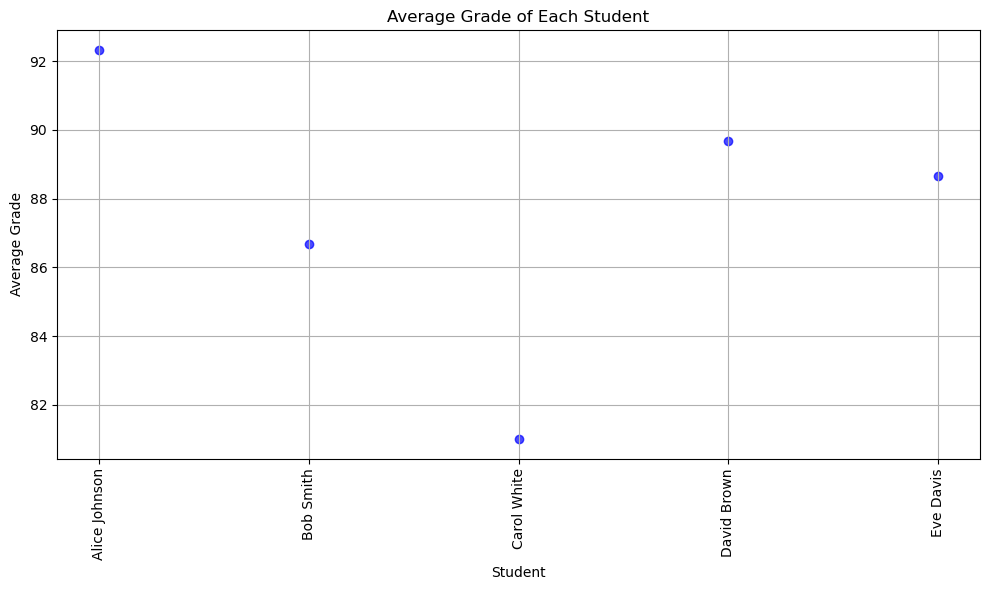

In [64]:
# Add a full_name column
grades_and_students_df['full_name'] = grades_and_students_df['first_name'] + ' ' + grades_and_students_df['last_name']

# Calculate average grade for each student
average_grades = grades_and_students_df.groupby('full_name')['grade'].mean().reset_index()

# Scatterplot of each student and their average grade
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(average_grades['full_name'], average_grades['grade'], color='blue', alpha=0.7)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.title('Average Grade of Each Student')
plt.grid(True)
plt.tight_layout()
plt.show()

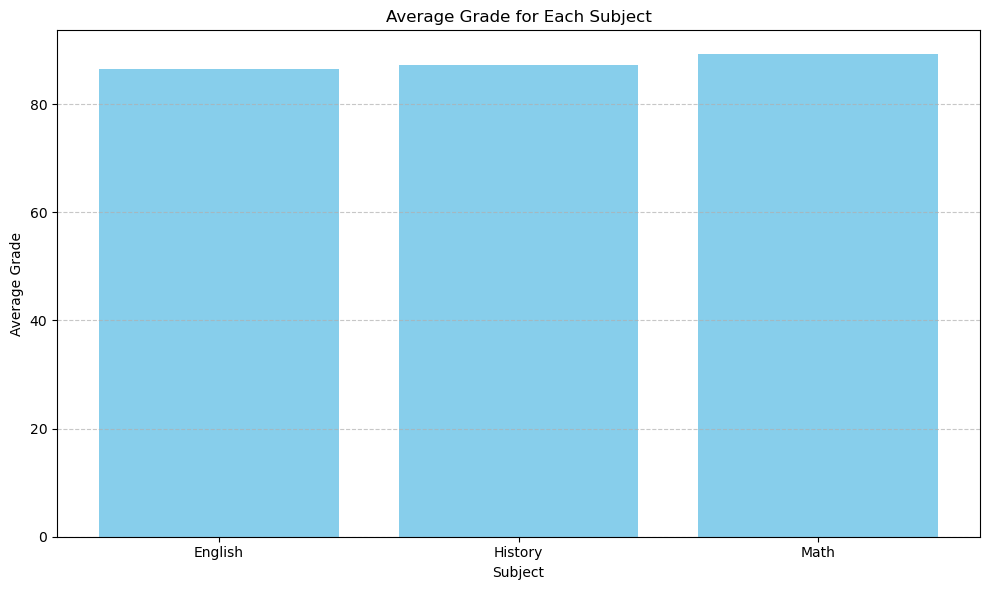

In [69]:
# Calculate average grade for each subject
average_grades_by_subject = grades_and_students_df.groupby('subject')['grade'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_grades_by_subject['subject'], average_grades_by_subject['grade'], color='skyblue')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grade for Each Subject')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()